In [1]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
# %matplotlib inline
# %matplotlib notebook
import os
import sys
import time
import json
import glob
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython import display
from tqdm.notebook import tqdm

# Data structures and functions for rendering
from pytorch3d.structures import Volumes
from pytorch3d.transforms import so3_exp_map
from pytorch3d.renderer import (
    FoVPerspectiveCameras,
    NDCMultinomialRaysampler,
    MonteCarloRaysampler,
    EmissionAbsorptionRaymarcher,
    ImplicitRenderer,
    RayBundle,
    ray_bundle_to_ray_points,
)

# obtain the utilized device
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    print(
        'Please note that NeRF is a resource-demanding method.'
        + ' Running this notebook on CPU will be extremely slow.'
        + ' We recommend running the example on a GPU'
        + ' with at least 10 GB of memory.'
    )
    device = torch.device("cpu")
%load_ext autoreload
%autoreload 2

In [2]:
# target_cameras, target_images, target_silhouettes = generate_cow_renders(num_views=40, azimuth_range=180)
# print(f'Generated {len(target_images)} images/silhouettes/cameras.')
import importlib
# importlib.reload(render_zero_pose)

import sys
sys.path.append('/home/azhuavlev/PycharmProjects/ml-neuman_mano/pytorch3d_nerf')

import losses.canonical_utils.test_canonical_cameras as test_cc
from losses.canonical_utils.cameras_canonical import create_canonical_cameras

n_cameras = 20
with torch.no_grad():
    target_cameras = create_canonical_cameras(n_cameras, random_cameras=False, device=device)

with torch.no_grad():
    images_tensor, silh_tensor, verts_zpose = test_cc.render_zero_pose(target_cameras)
# images_np = images_tensor.cpu().numpy()
# silh_np = silh_tensor.cpu().numpy()

target_images = images_tensor
target_silhouettes = (silh_tensor > 0).float().clip(0, 1).squeeze(-1)

!!!!
Fix shapedirs bug of MANO
silhouettes_zero_pose.shape torch.Size([60, 512, 334])
Fix shapedirs bug of MANO


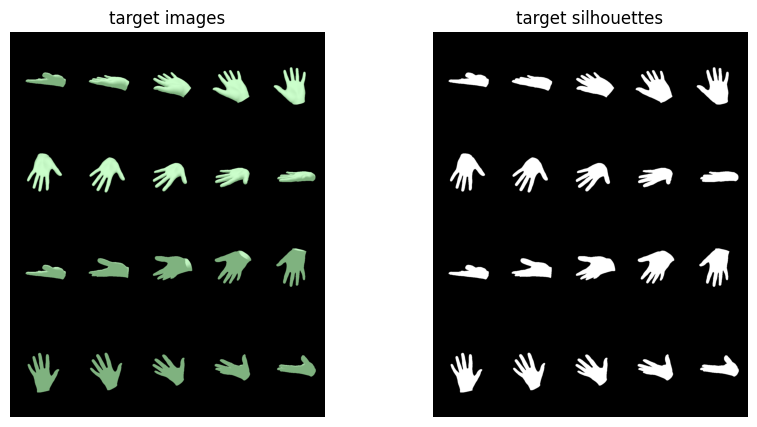

In [3]:
# display target images and silhouettes in a torchvision grid
import torchvision

%matplotlib inline
grid_image = torchvision.utils.make_grid(target_images.permute(0,3,1,2).cpu(), nrow=5)
target_silhouettes_unsq = target_silhouettes.unsqueeze(-1)
grid_silhouette = torchvision.utils.make_grid(target_silhouettes_unsq.permute(0,3,1,2).cpu(), nrow=5)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(grid_image.permute(1,2,0))
ax[0].axis('off')
ax[0].set_title('target images')
ax[1].imshow(grid_silhouette.permute(1,2,0))
ax[1].axis('off')
ax[1].set_title('target silhouettes')
plt.show()

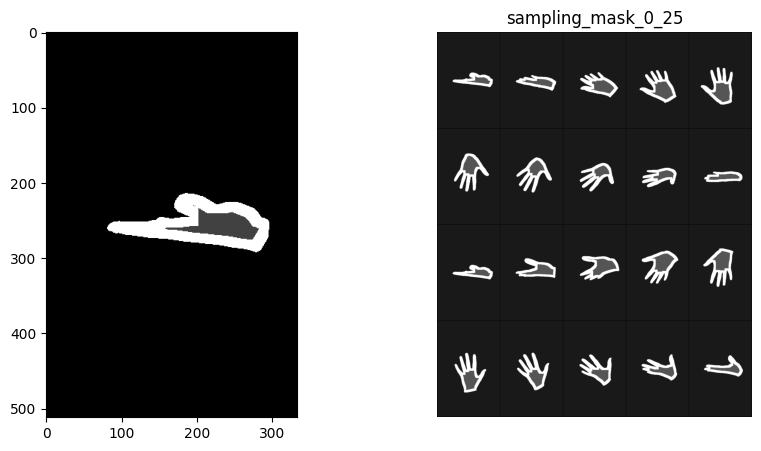

In [4]:
import sampling_utils

sampling_mask = sampling_utils.sampling_mask_0_25(target_silhouettes).cpu()

grid_silhouette = torchvision.utils.make_grid(sampling_mask.unsqueeze(-1).permute(0,3,1,2).cpu(), nrow=5)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(sampling_mask[0] / sampling_mask[0].max(), cmap='gray')
ax[1].imshow(grid_silhouette.permute(1,2,0) / grid_silhouette.max())
ax[1].axis('off')

plt.title('sampling_mask_0_25')
plt.show()

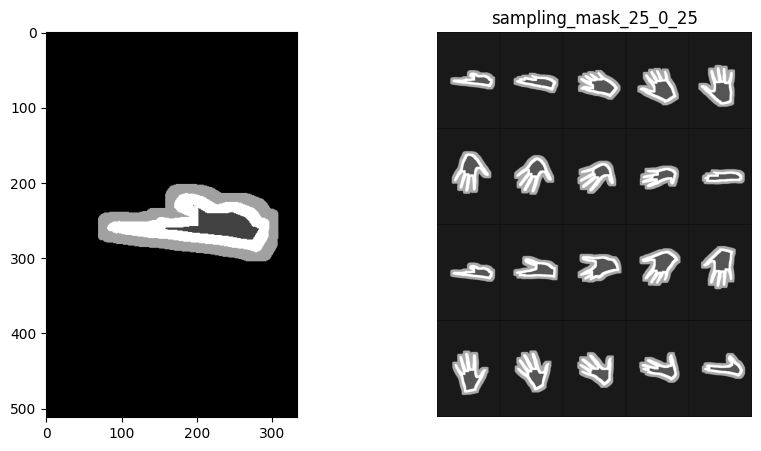

In [5]:
import sampling_utils

sampling_mask = sampling_utils.sampling_mask_25_0_25(target_silhouettes).cpu()

grid_silhouette = torchvision.utils.make_grid(sampling_mask.unsqueeze(-1).permute(0,3,1,2).cpu(), nrow=5)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(sampling_mask[0] / sampling_mask[0].max(), cmap='gray')
ax[1].imshow(grid_silhouette.permute(1,2,0) / grid_silhouette.max())
ax[1].axis('off')

plt.title('sampling_mask_25_0_25')
plt.show()